In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
import requests
import io

#Serbia's Response to Covid-19
######Dennis Djunic

The current Covid-19 pandemic has shown to be one of the world’s defining health crises. The virus has rapidly spread all over the world, effecting each person’s individual life in numerous ways. Governments have tried several tactics such as lockdowns and social distancing to slow the spread of the virus. Even though some countries have managed to control the spread of the virus, the overall case counts have been exponentially increasing. At first, Serbia had a large initial spike in cases. They were then able to get the spread under control; however, a second wave of cases was seen after restrictions on business and gathering were lifted.

In [14]:
locations = pd.read_csv('locations.csv')
location = locations.loc[locations['location'] == 'Serbia']

In [15]:
big_corona_data = pd.read_csv('owid-covid-data.csv', parse_dates= ['date'], index_col= ['date'])
big_corona_data = big_corona_data['2020-03-01': '2020-09-02']

In [16]:
SRB_corona = big_corona_data.loc[big_corona_data['iso_code'] == 'SRB']

In [17]:
date_form = DateFormatter("%m-%Y")
locator = mdates.MonthLocator(interval=1)
sns.set()

In [18]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

###General Trends in Serbia's Covid-19 cases

Serbia’s response at the beginning of the pandemic was executed quickly. In Serbia, the first case was reported on March 6th. On March 15th, a state of emergency was declared, and the country was immediately shut down. As cases continued to rise, the government-imposed weekend long curfews. The only time people could leave their houses would be for 20 minutes a day with the purpose of allowing everyone some fresh air. Additionally, only groups of two people were allowed in public areas. People over the age of sixty-five were not allowed to leave their house. These harsh restrictions had a large impact on the case count, resulting in the new daily case rate beginning to plummet at the end of April. With a decrease in cases, the Serbian government decided to begin relaxing restrictions. They allowed businesses to open, curfews were lifted, and by June 1 large gatherings were once again allowed. Not long after restrictions lifted Serbia began to see an enormous spike in cases that was larger than the first wave. The death toll increased dramatically, but this time the government was slow to react. Some restrictions were implemented on the size of public gatherings, but the restrictions were nowhere near as extreme as during the first wave. This could be in part because the people were becoming restless and when President Vučič called for another round of shutdowns and curfews, thousands started protesting in the streets. Protests caused cases to continue to rise and a peak was reached of 467 new cases in one day. Then, the number of cases started to decline. This decline was more gradual than the first wave that had stricter lockdowns. In present day, Serbia has the second wave under control; however, the country is still at risk of making the same mistake they did after lifting restrictions the first time.

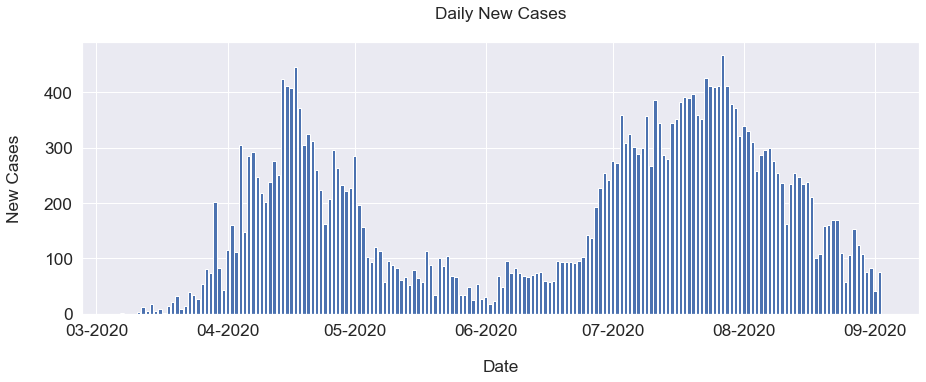

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(SRB_corona.index.values, SRB_corona['new_cases'], color = 'b')
ax.set(xlabel="\nDate",
       ylabel="New Cases\n",
       title="Daily New Cases\n")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(locator)

plt.show()




###Comparing Serbia to other European Countries adjusted for population: Coratia, France, Greece, and Italy.

In [19]:
more_countries_corona_data = big_corona_data.loc[big_corona_data['iso_code'].isin(['GRC', 'HRV', 'SRB', 'FRA', 'ITA'])]


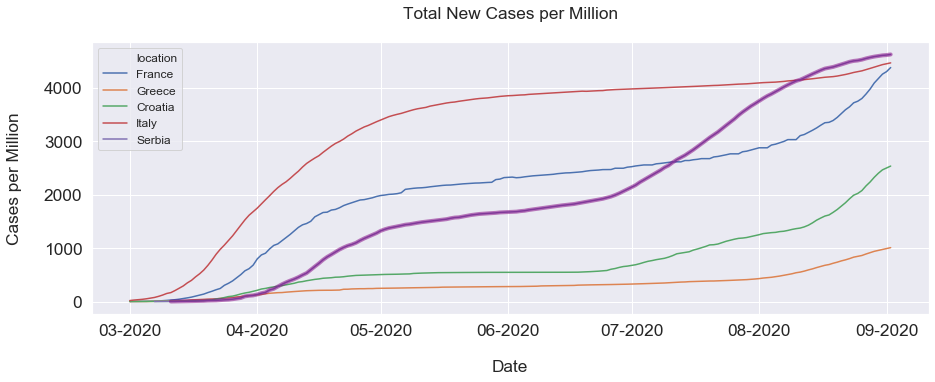

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x = more_countries_corona_data.index.values, y = more_countries_corona_data['total_cases_per_million'],
             hue = more_countries_corona_data['location'])
plt.plot(SRB_corona.index.values, SRB_corona['total_cases_per_million'], marker='', color='purple', linewidth=4, alpha=0.5)
ax.set(xlabel="\nDate",
       ylabel="Cases per Million\n",
       title="Total New Cases per Million\n")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(locator)
plt.show()



Croatia and Greece have a similar population and GDP to Serbia but have been able to handle the virus much better. This comes down to two main things: pre-existing conditions and government response. The life expectancy, median age, and number of male and female smokers are very similar in these three countries; however, the diabetes prevalence and cardiovascular death rate greatly differ. Serbia’s diabetes rate is almost twice as high, and the cardiovascular death rate is almost two times as large as in Croatia and Greece. This has an effect on the number of deaths from the virus. It additionally could be why the deaths per million is much greater for Serbia than it is for Croatia and Greece. However, Greece and Croatia also have a significantly lower total number of cases than Serbia, which could be the result of a better government response. Both countries followed a similar timeline to Serbia during the beginning stages of the pandemic. A strict lockdown was imposed where schools, businesses, and travel were all shut down. However, even during this stage, Greece and Croatia were able to keep their case counts much lower than Serbia by applying restrictions on travel within each country. Greece set up roadblock on major roadways to not allow people to travel unless it was considered essential. This extreme lockdown is one of the reasons why Greece has not seen a large spike in cases and has been praised by many as having one of the best responses in Europe However, Greece has experienced some side effects with the implementation of their lockdown. Tourism represents one of Greece’s largest revenue generators. The lockdowns have almost entirely destroyed that industry this summer to an extent that remains unknown. Greece just recovered from a debt crisis that lasted decades. With this debt crisis and the lack of tourism this year, it will be interesting to see how the economy continues to recover. Croatia has delayed the start of the second wave, but now looks to be making the same mistakes Serbia did. As restrictions are lifted, cases are beginning to increase just as they did in Serbia. Therefore, Croatia faces a large second wave of cases if something is not done to slow the spread.

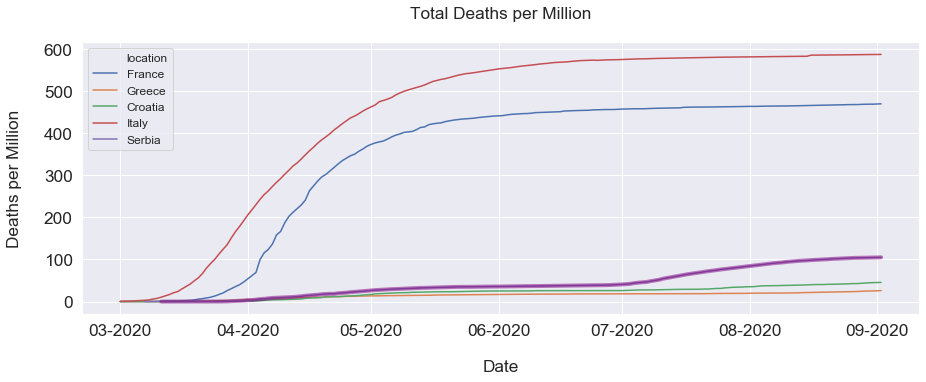

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x = more_countries_corona_data.index.values, y = more_countries_corona_data['total_deaths_per_million'],
             hue = more_countries_corona_data['location'])
plt.plot(SRB_corona.index.values, SRB_corona['total_deaths_per_million'], marker='', color='purple', linewidth=4, alpha=0.5)
ax.set(xlabel="\nDate",
       ylabel="Deaths per Million\n",
       title="Total Deaths per Million\n")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(locator)
plt.show()

When comparing Serbia’s response to those of larger, more powerful European countries such as France and Italy, a drastic difference in death rate, but a similar plot of total cases adjusted for population is shown. Serbia recently had the most cases per million out of the chosen countries. Italy was the first European country to get hit by Covid-19 and was leading the world in total number of cases at one point. France was not far behind Italy, and both countries implemented strict government-imposed lockdowns to try and slow the spread of the virus. During Italy’s surge in cases, the death rate was approaching almost 10%. This was the highest in the world by a considerable margin. Italy was used as an example of how not to handle the pandemic and represented a worst-case scenario for other countries. Comparing total deaths per million with Serbia, both Italy and France have 5 to 6 times the deaths than Serbia. This is a very interesting statistic because individuals discuss the quality of healthcare offered as one of the best ways to prevent deaths. Italy and France have much better healthcare available to people than Serbia does. One explanation for the discrepancy in deaths, could be how the elderly live once they are retired. In Serbia, the majority of seniors do not end up in nursing homes, thus not many of them exist. In contrast, France and Italy both have a large concentration of nursing homes that have been linked to a large percentage of deaths. The initial government response in all three of these countries was similar: strict government lockdowns that restricted public gatherings and shut down businesses. Serbia was the first to lift lockdowns and has seen a second wave even larger than the first. France recently lifted restrictions. They have allowed events with greater numbers of people and have held sporting events such as the Tour de France. Since lockdowns have been eased, France is seeing a spike in cases, just like Serbia.

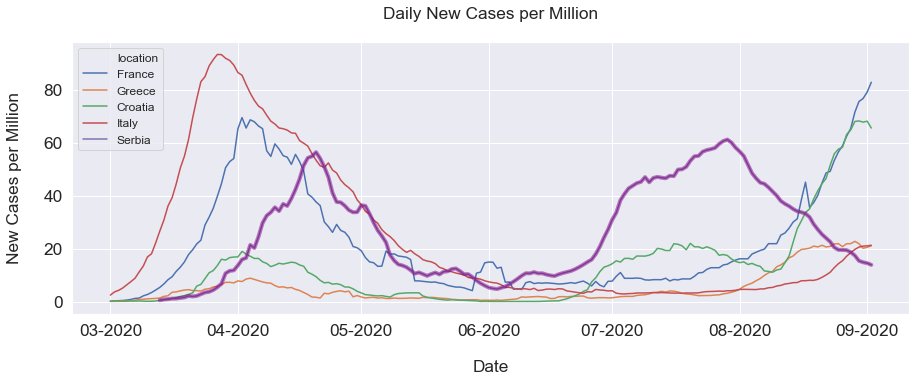

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x = more_countries_corona_data.index.values, y = more_countries_corona_data['new_cases_smoothed_per_million'],
             hue = more_countries_corona_data['location'])
plt.plot(SRB_corona.index.values, SRB_corona['new_cases_smoothed_per_million'], marker='', color='purple', linewidth=4, alpha=0.5)
ax.set(xlabel="\nDate",
       ylabel="New Cases per Million\n",
       title="Daily New Cases per Million\n")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(locator)
plt.show()


###Conclusion

Serbia’s coronavirus response has not been as good as it could have been. They were able to get the initial spike under control but failed to keep it under control and saw a large second wave. Similar countries have done a better job to slow the spread of the virus through government actions and having a healthier population. For now, this has let them avoid a second wave of the virus. However, the data demonstrates that once strict lockdowns are eased and larger gatherings are allowed, cases start to rapidly climb. This has happened in Serbia, France, Croatia, and many other countries including the United States. Obviously indefinite lockdowns are not an option, but a more cautious way of reopening must be thought of and citizens need to take responsibly for their health and other's health to prevent countries from suffering from multiple waves of Covid-19.